In [4]:
import pandas as pd
import os

# Load the CSV file into a DataFrame
os.chdir('..')
df = pd.read_csv('Data/bills.csv')

# Display the first few rows of the DataFrame
df.head()

,bill_paid_at_local,bill_total_billed,bill_total_discount_item_level,bill_total_gratuity,bill_total_net,bill_total_tax,bill_total_voided,bill_uuid,business_date,order_duration_seconds,order_seated_at_local,order_closed_at_local,order_take_out_type_label,order_uuid,payment_amount,payment_count,payment_total_tip,sales_revenue_with_tax,venue_xref_id,waiter_uuid
0,2024-07-01 09:17:01,21.81,0.0,0.0,19.30,2.51,0.0,240701091701~4D63608F-523C-4EFF-9A4F-78D6C44B5159,2024-07-01,46,2024-07-01 09:16:15,2024-07-01 09:17:01,dinein,240701091615~EF1C6E91-B6C4-4DF1-8A92-1B024197FEC3,21.81,1,0.0,21.81,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
1,2024-07-01 13:37:00,48.95,0.0,0.0,43.32,5.63,0.0,240701133659~3A0BEDE2-E9E5-484D-B909-780E485F0D69,2024-07-01,288,2024-07-01 13:32:12,2024-07-01 13:37:00,dinein,240701133212~A4C33BFA-A54F-4627-B0C2-7428427FB5DE,48.95,1,0.0,48.95,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
2,2024-07-01 11:19:32,26.94,0.0,0.0,23.84,3.10,0.0,240701111931~670EEB85-E939-4924-B92F-C95076B7E930,2024-07-01,135,2024-07-01 11:17:17,2024-07-01 11:19:32,dinein,240701111717~6074B0AB-2432-484D-BC3F-55CC5D731818,26.94,1,0.0,26.94,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
3,2024-07-01 15:05:59,3.96,0.0,0.0,3.77,0.19,0.0,240701150558~3D6F473E-D5EF-4BB8-AFAB-30DB2A0764C0,2024-07-01,48,2024-07-01 15:05:11,2024-07-01 15:05:59,dinein,240701150511~EAA68F41-20ED-4FC7-B902-B0B3878AEC82,3.96,1,0.0,3.96,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
4,2024-07-01 12:41:00,3.36,0.0,0.0,3.20,0.16,0.0,240701124059~0521794C-51FC-4C30-A368-995CE4DE105F,2024-07-01,103,2024-07-01 12:39:17,2024-07-01 12:41:00,dinein,240701123917~27764E1C-7E7F-4293-ABC7-5921310A654A,3.36,1,0.0,3.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD


In [26]:
df['order_duration_minutes'] = df['order_duration_seconds'] / 60
df['order_duration_minutes'].median()
iqr_95_top = df['order_duration_minutes'].quantile(0.97)
iqr_95_top

np.float64(231.38333333333333)

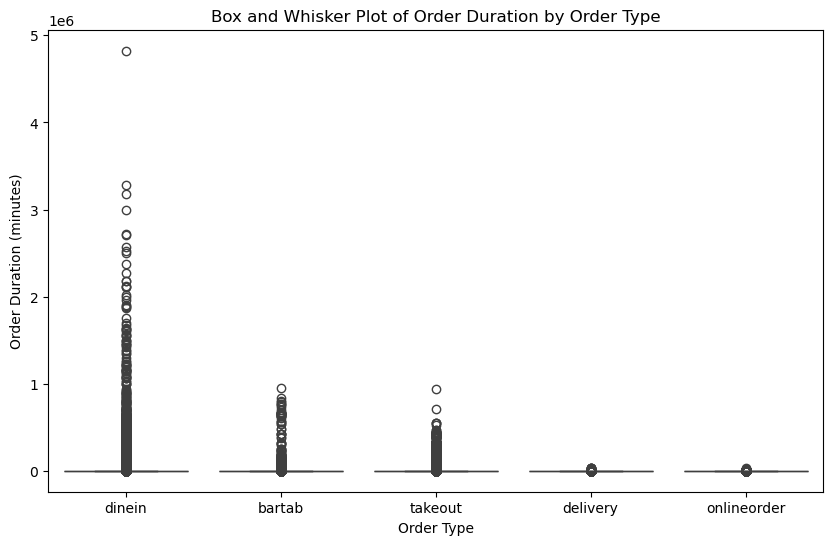

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order duration from seconds to minutes
df['order_duration_minutes'] = df['order_duration_seconds'] / 60

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_take_out_type_label', y='order_duration_minutes', data=df)
plt.title('Box and Whisker Plot of Order Duration by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Order Duration (minutes)')
plt.show()


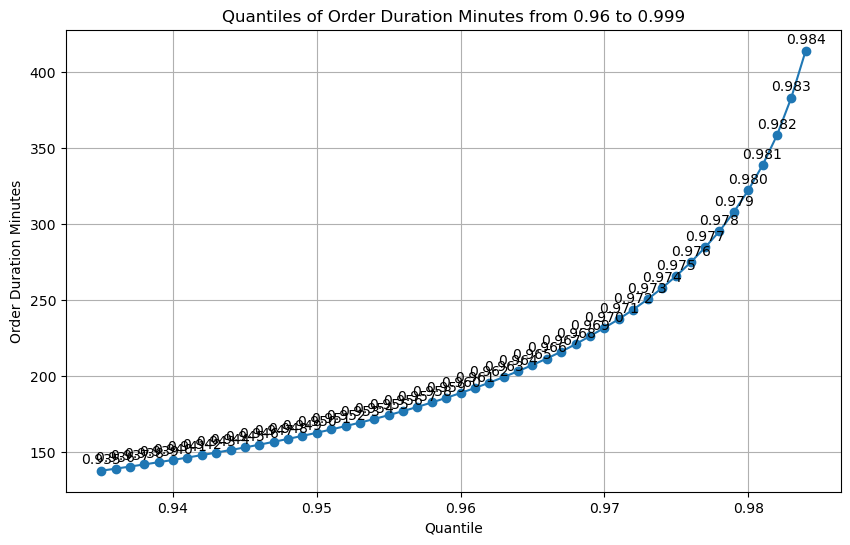

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate quantiles from 0.96 to 0.999 in 0.001 increments
quantiles = np.arange(0.935, 0.985, 0.001)
quantile_values = [df['order_duration_minutes'].quantile(q) for q in quantiles]

# Plot the quantiles
plt.figure(figsize=(10, 6))
plt.plot(quantiles, quantile_values, marker='o')

# Annotate each point with the quantile number
for i, q in enumerate(quantiles):
    plt.annotate(f'{q:.3f}', (q, quantile_values[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Quantiles of Order Duration Minutes from 0.96 to 0.999')
plt.xlabel('Quantile')
plt.ylabel('Order Duration Minutes')
plt.grid(True)
plt.show()

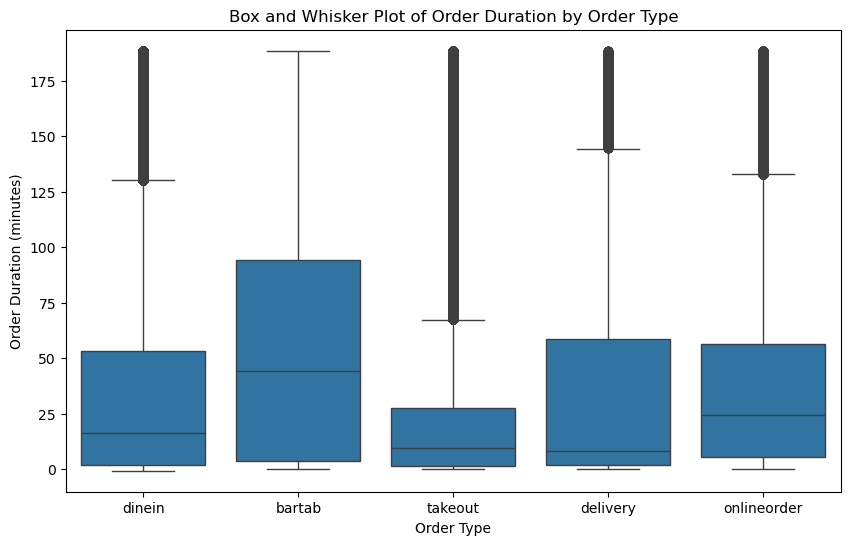

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where order_duration_minutes is greater than 180
filtered_df = df[df['order_duration_minutes'] <= df['order_duration_minutes'].quantile(0.96)]

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_take_out_type_label', y='order_duration_minutes', data=filtered_df)
plt.title('Box and Whisker Plot of Order Duration by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Order Duration (minutes)')
plt.show()


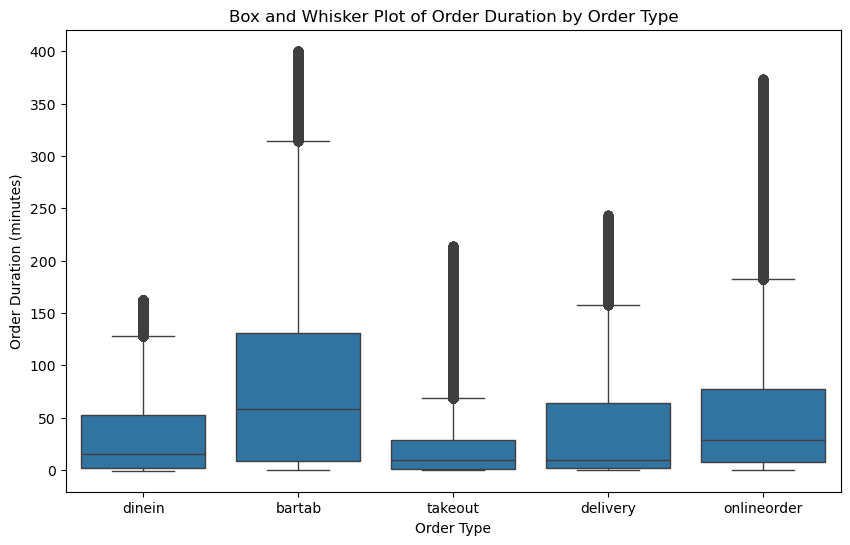

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 0.96 quantile for each order type
quantile_96_per_type = df.groupby('order_take_out_type_label')['order_duration_minutes'].quantile(0.96)

# Filter the DataFrame based on the 0.96 quantile for each order type using .map()
filtered_df = df[df['order_duration_minutes'] <= df['order_take_out_type_label'].map(quantile_96_per_type)]

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_take_out_type_label', y='order_duration_minutes', data=filtered_df)
plt.title('Box and Whisker Plot of Order Duration by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Order Duration (minutes)')
plt.show()
